# House Price Prediction Dataset
- In this project we will be doing preprocessing and majorly will be focusing on Data Visualization. 

### Importing packages

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

### Importing Dataset

In [12]:
df = pd.read_csv('housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


### Information about Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


### Describe Dataset

In [14]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


### Splitting into Feature & Label

In [15]:
df_features = df.drop('Price',axis=1)
df_label = df[['Price']]

### Information about Features

In [16]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SquareFeet    50000 non-null  int64 
 1   Bedrooms      50000 non-null  int64 
 2   Bathrooms     50000 non-null  int64 
 3   Neighborhood  50000 non-null  object
 4   YearBuilt     50000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


### Information about Label

In [17]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   50000 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


### Checking for N-Unique Values for categorical column

In [18]:
df_features['Neighborhood'].nunique() # Getting count of total number of categorical values
df_features['Neighborhood'].value_counts() # Getting list of categories  

Suburb    16721
Rural     16676
Urban     16603
Name: Neighborhood, dtype: int64

### Encoding on Categorical column

In [21]:
ordinal_encoder = OrdinalEncoder()
df_features['Neighborhood'] = ordinal_encoder.fit_transform(df_features[['Neighborhood']])
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  float64
 4   YearBuilt     50000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.9 MB


### Plotting SquareFeet vs Price
- From this below scatter plot we could state that, Square Feet and Price both are Positively correlated to each other, because when Square Feet increases house of the price is increases.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


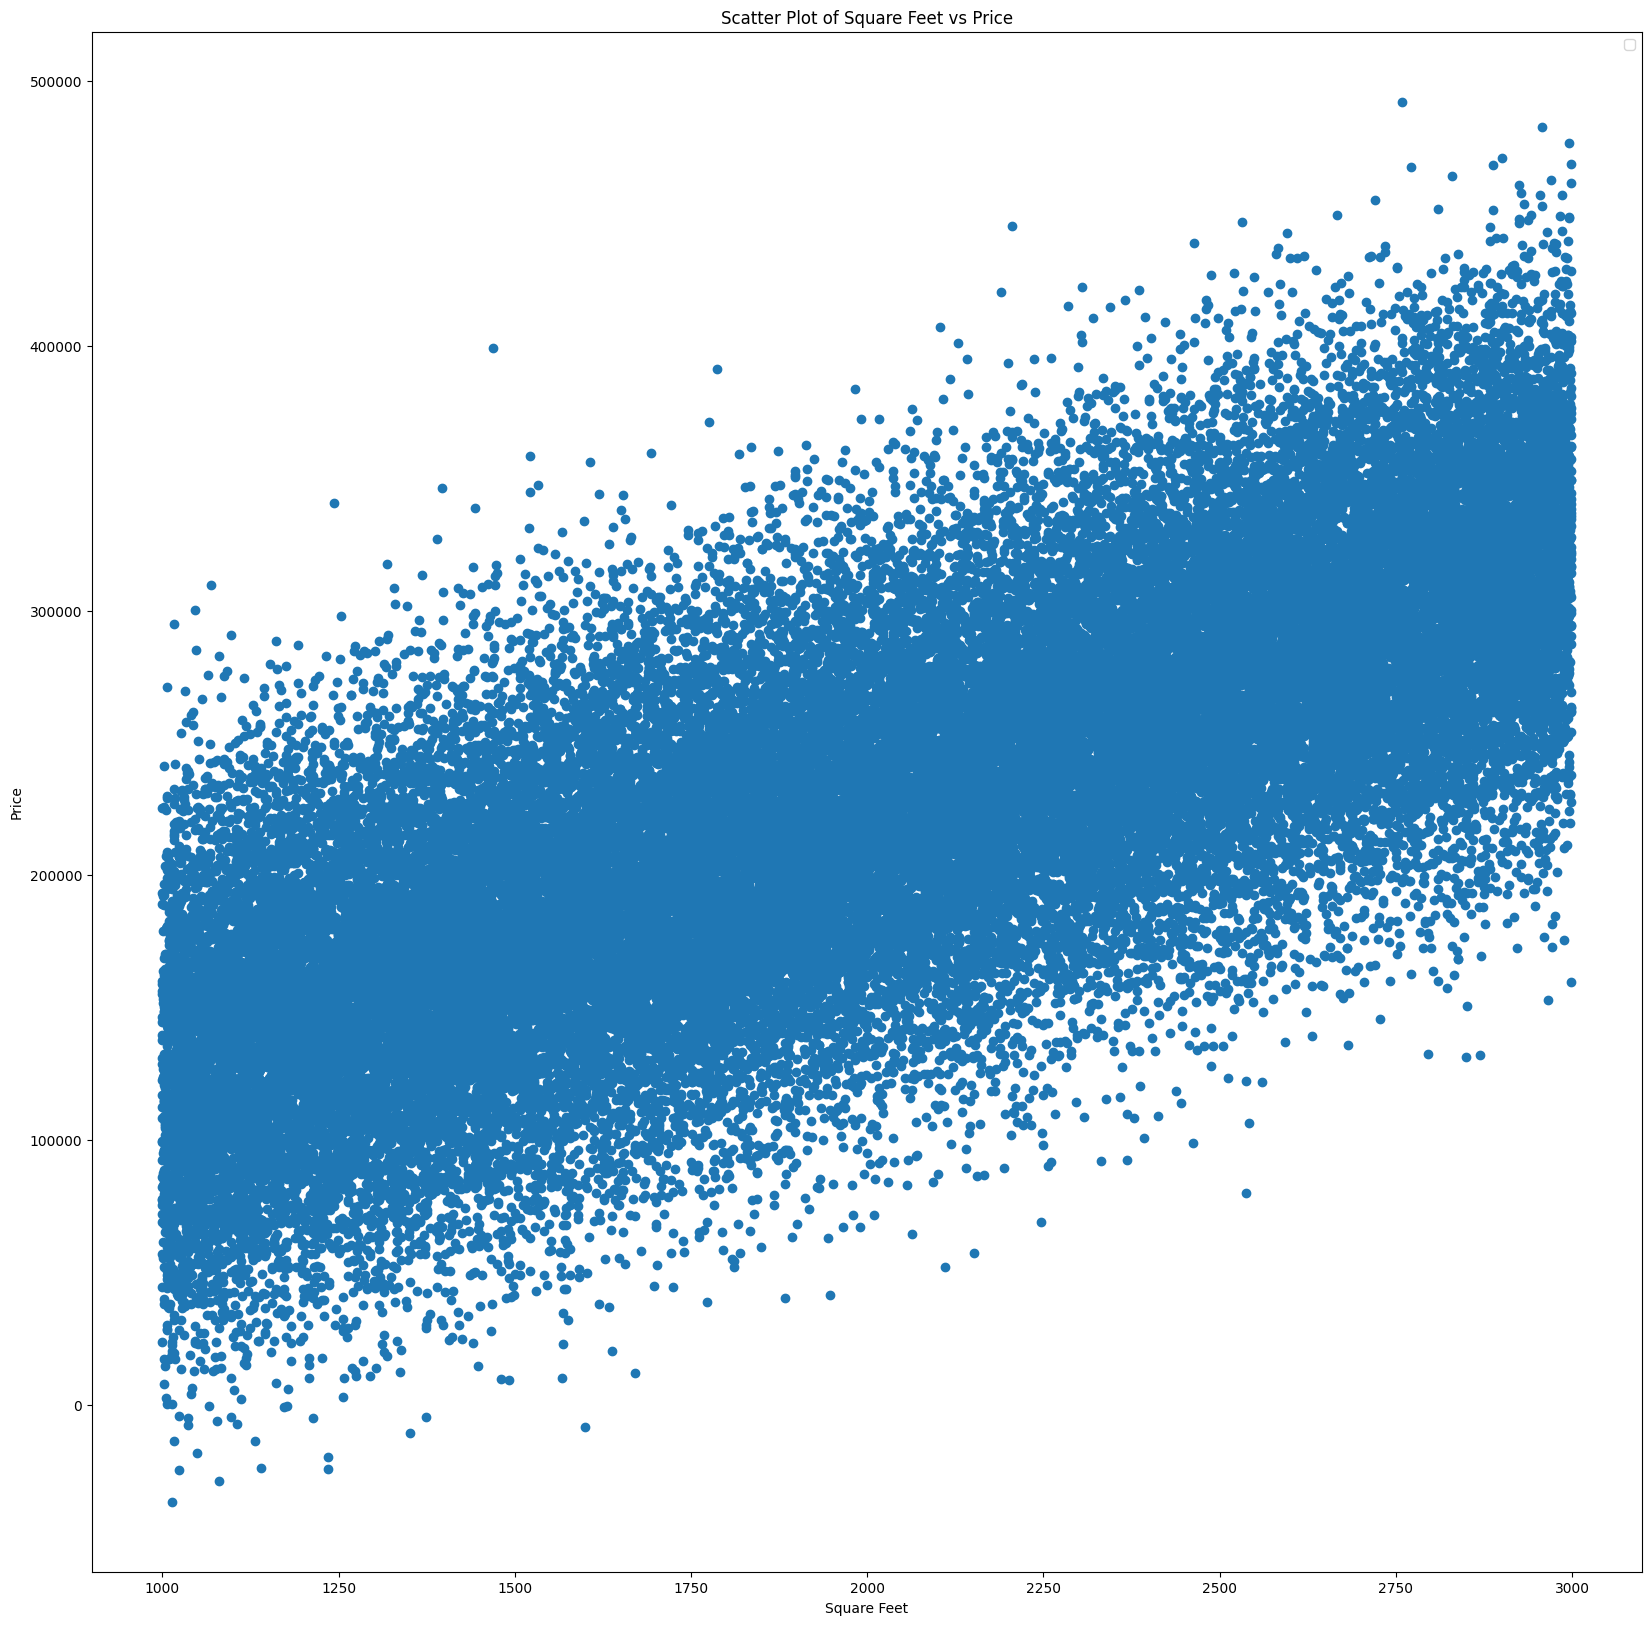

In [39]:
# Scatter plot
plt.figure(figsize=(20,20))
plt.scatter(df_features['SquareFeet'],df_label['Price'])
plt.title('Scatter Plot of Square Feet vs Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()
plt.show()

### Plotting Neighborhood vs price
- From this below graph we could consider that Houses prices in Rural area are highest, Suburb area has lesser price of house, and Urban area has lowest price of highest price range for houses. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


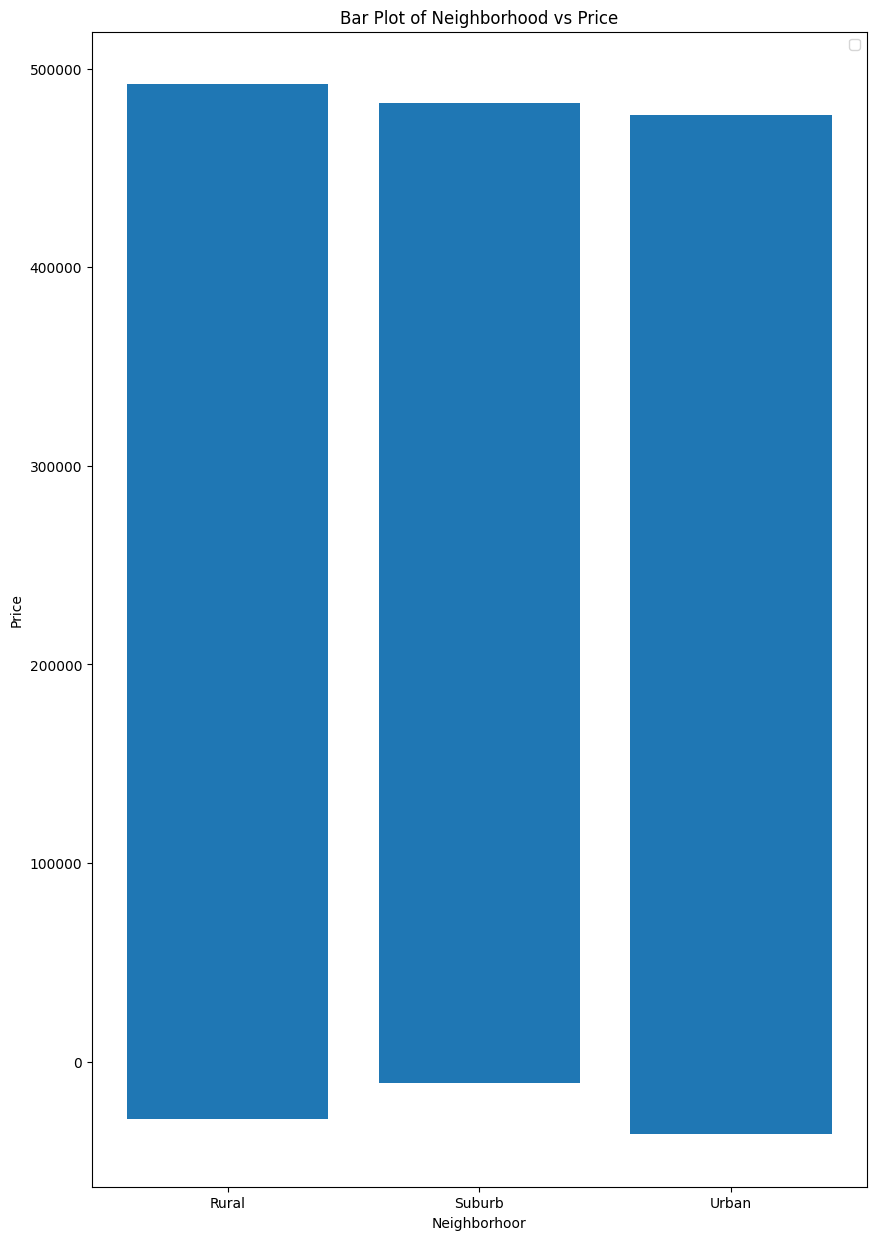

In [54]:
# Bar plot
plt.figure(figsize=(10,15))
plt.bar(x=df['Neighborhood'],height=df_label['Price'])
plt.title('Bar Plot of Neighborhood vs Price')
plt.xlabel('Neighborhoor')
plt.ylabel('Price')
plt.legend()
plt.show()

### Plotting Bedrooms vs Bathrooms
- Below graph shows that we are having each number of bedrooms and bathrooms as per our choice, we dont have any limitation of choosing strict type of numbers of bedrooms and bathrooms.

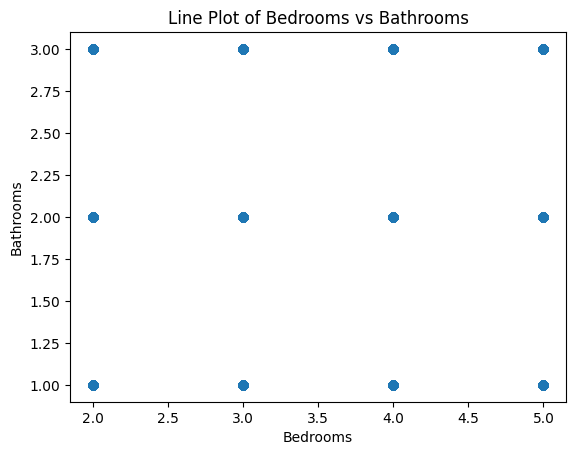

In [52]:
# Line plot
plt.scatter(df_features['Bedrooms'], df_features['Bathrooms'])
plt.title('Line Plot of Bedrooms vs Bathrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Bathrooms')
plt.show()

### Plotting Box plot (Checking feature outliers)

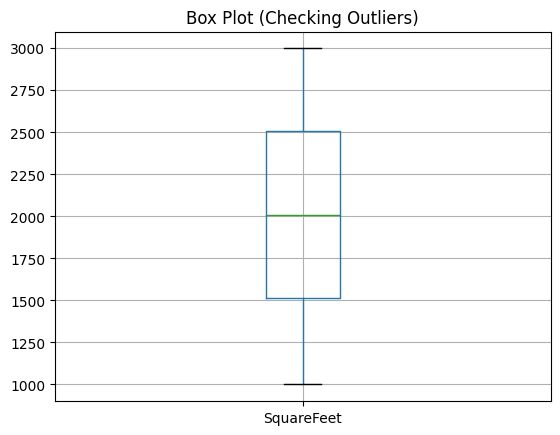

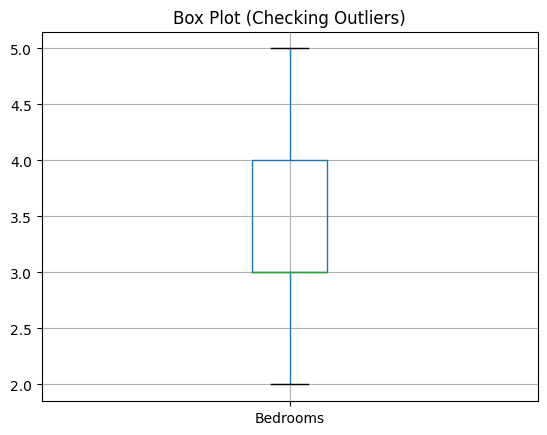

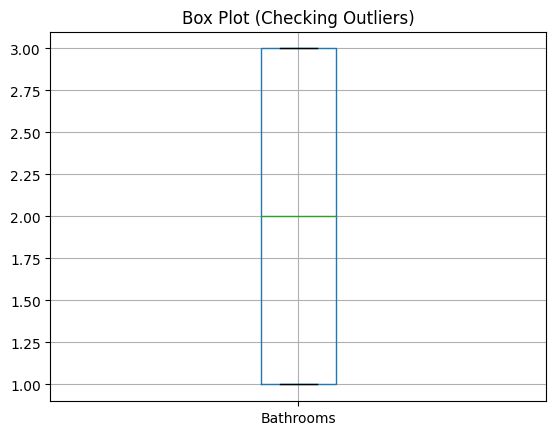

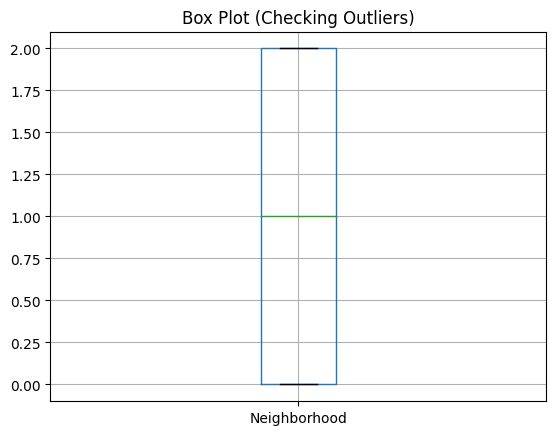

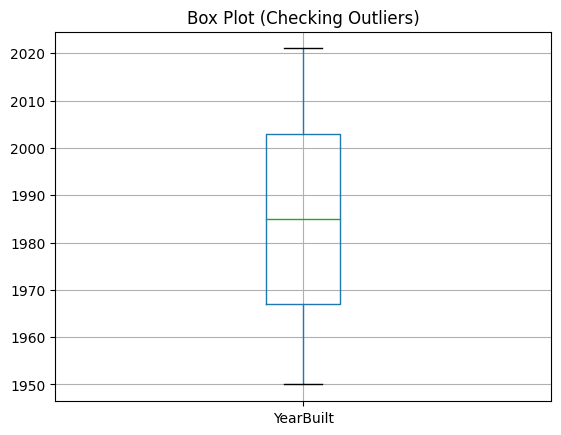

In [56]:
for cols in df_features.columns:
    df_features[[cols]].boxplot()
    plt.title("Box Plot (Checking Outliers)")
    plt.show()

### Plotting Box plot (Checking label outliers)

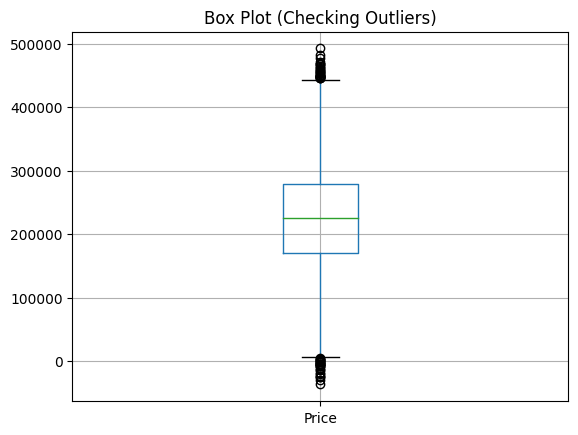

In [57]:
df_label.boxplot()
plt.title("Box Plot (Checking Outliers)")
plt.show()

### Removing outliers from Label

<AxesSubplot: >

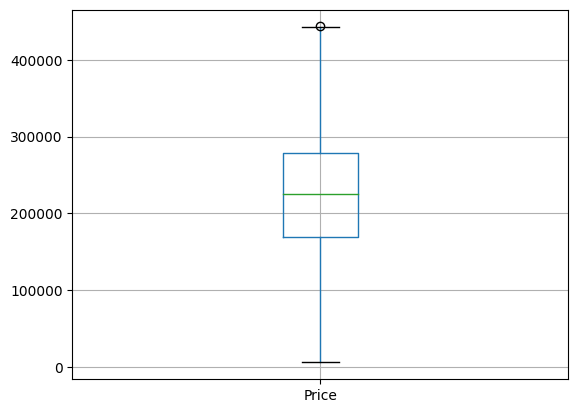

In [59]:
Q1 = df_label.quantile(0.25)
Q3 = df_label.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_label_no_outliers = df_label[(df_label >= lower_bound) & (df_label <= upper_bound)]
df_label_no_outliers = pd.DataFrame(df_label_no_outliers,columns=df_label.columns)
df_label_no_outliers.boxplot() # Outliers are removed

### Finding Missing values in label
- As we have removed outliers now those values became NaN values now to fill those NaN values we are applying imputer to find missing values.

In [64]:
imputer = SimpleImputer()
df_label_no_missingVal = imputer.fit_transform(df_label_no_outliers)
df_feature_no_missingVal = imputer.fit_transform(df_features)
print(len(df_label_no_missingVal),len(df_feature_no_missingVal))

# Converting final Feature and label to dataframe
df_final_features = df_feature_no_missingVal.copy()
df_final_label = df_label_no_missingVal.copy()

50000 50000


`Note:` Preprocessing and Data visualization for this project has done, you could apply more techniques to make this data more efficient as per your requirements. For more visit: www.github.com/itechdp